In [18]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import tqdm


In [19]:
dataNode = pd.read_csv('../data/Link.csv')                       
dataLink = pd.read_csv('../data/Node.csv')                       


In [20]:
df_dataLink = pd.DataFrame(dataLink)
df_dataNode = pd.DataFrame(dataNode)


In [21]:
df_dataNode.head()

,relation,source,target
0,r_subdomain,Domain_34a6231f101fdfa2b051beaa4b94d463fe5f9f4...,Domain_5052db3f33d5337ab631025f7d5de3c5ac559ed...
1,r_dns_a,Domain_34a6231f101fdfa2b051beaa4b94d463fe5f9f4...,IP_37f7ed5739b43757ff23c712ae4d60d16615c59c081...
2,r_cert,Domain_34a6231f101fdfa2b051beaa4b94d463fe5f9f4...,Cert_9ace6aae20e3ac6d9ebfae8938b91112460b27ad2...
3,r_dns_a,Domain_5052db3f33d5337ab631025f7d5de3c5ac559ed...,IP_37f7ed5739b43757ff23c712ae4d60d16615c59c081...
4,r_dns_a,Domain_32b4d5d93789d5436fe729499c7b4d311742797...,IP_37f7ed5739b43757ff23c712ae4d60d16615c59c081...


In [22]:
df_dataLink.head()

,id,name,type,industry
0,Domain_34a6231f101fdfa2b051beaa4b94d463fe5f9f4...,34a6231f10.com,Domain,"['C', 'E', 'A', 'B']"
1,Domain_5052db3f33d5337ab631025f7d5de3c5ac559ed...,5052db3f33.com,Domain,"['C', 'E', 'A', 'B']"
2,IP_37f7ed5739b43757ff23c712ae4d60d16615c59c081...,5.180.xxx.xxx,IP,[]
3,Cert_9ace6aae20e3ac6d9ebfae8938b91112460b27ad2...,9ace6aae20,Cert,[]
4,Domain_32b4d5d93789d5436fe729499c7b4d311742797...,32b4d5d937.com,Domain,"['C', 'E', 'A', 'B']"


In [23]:
# industry_list = df_dataNode['industry'].value_counts()
# industry_list



In [24]:
# type_list = df_dataNode['type'].value_counts()
# type_list


In [25]:
relation_list = df_dataLink['relation'].value_counts()
relation_list

KeyError: 'relation'

## cleaner

In [ ]:
# slef_loop = df_dataLink[df_dataLink['source'] == df_dataLink['target']]
# len(slef_loop)

In [ ]:
# Prune_Branches = df_dataLink[df_dataLink['relation'].isin(['r_asn','r_cidr','r_whois_name','r_whois_email','r_whois_phone'])]
# len(Prune_Branches)
# Prune_Branches.head()




In [ ]:
# drop_node = df_dataNode[df_dataNode['id'].isin(Prune_Branches['target'])]
# df_dataNode = df_dataNode.drop(drop_node.index)
# len(df_dataNode)

In [ ]:

# df_dataLink = df_dataLink.drop(Prune_Branches.index)
# len(df_dataLink)

## -------

In [ ]:
# node_list = df_dataNode['id'].values.tolist()

In [ ]:
# core1 = 'Domain_c58c149eec59bb14b0c102a0f303d4c20366926b5c3206555d2937474124beb9'
# core2 = 'Domain_f3554b666038baffa5814c319d3053ee2c2eb30d31d0ef509a1a463386b69845'

# core1_row = df_dataNode[df_dataNode['id'].isin([core1])]
# core2_row = df_dataNode[df_dataNode['id'].isin([core2])]

# print(core1_row,core2_row)



In [ ]:
G = nx.Graph()

for i in range(len(df_dataNode)):
      G.add_node(df_dataNode['id'][i])

for i in range(len(df_dataLink)):
      G.add_edge(df_dataLink['source'][i], df_dataLink['target'][i])




In [ ]:
num_edges = G.number_of_edges()
num_nodes = G.number_of_nodes()

print("Number of edges:", num_edges)
print("Number of nodes:", num_nodes)


Number of edges: 617
Number of nodes: 368


ValueError: weight='none' is invalid

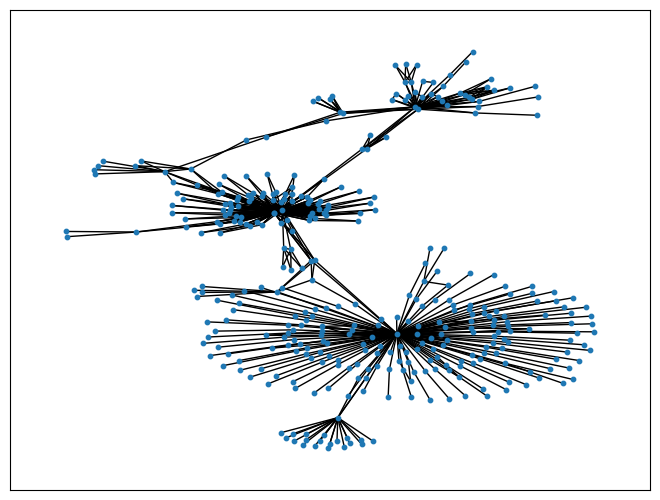

In [ ]:
nx.draw(G, with_labels=True, font_weight='none', font_size=8, node_size=10)


In [ ]:
degree_centrality = nx.degree_centrality(G)
# 打印节点的度中心性
# Create a dataframe to store node and centrality
df = pd.DataFrame({'Node': list(degree_centrality.keys()), 'Centrality': list(degree_centrality.values())})

df_dataNode['centrality'] = df['Centrality']

    

In [ ]:
np.sort(df_dataNode["centrality"].unique())

In [ ]:
centrality_list = nx.pagerank(G)
df = pd.DataFrame({'Node': list(centrality_list.keys()), 'Centrality': list(centrality_list.values())})

df_dataNode['radomCentrality'] = df['Centrality']


In [ ]:
df_dataNode

In [ ]:
core1 = 'Domain_c58c149eec59bb14b0c102a0f303d4c20366926b5c3206555d2937474124beb9'
core2 = 'Domain_f3554b666038baffa5814c319d3053ee2c2eb30d31d0ef509a1a463386b69845'
print(df_dataNode[df_dataNode['id'].isin([core1,core2])])

In [ ]:
# G.remove_edges_from(nx.selfloop_edges(G))


In [ ]:
# # 使用K-Shell算法找到K-核分解
# k_shell = nx.core_number(G)

# # 找到包含core1和core2的子图
# subgraph_nodes = []
# for node, core_number in k_shell.items():
#     if node == core1 or node == core2:
#         subgraph_nodes.append(node)
#     elif core1 in G.neighbors(node) and core2 in G.neighbors(node):
#         subgraph_nodes.append(node)

# # 构建子图
# subgraph = G.subgraph(subgraph_nodes)

In [ ]:
# len(subgraph)

In [ ]:
# def find_subgraph(core1, core2, G):
#    # Calculate the k-shell values of the nodes in the graph.
#    k_shell_values = nx.k_shell(G)

#    # Find the k-shell values of the two cores.
#    core1_k_shell_value = k_shell_values[core1]
#    core2_k_shell_value = k_shell_values[core2]

#    # Initialize the subgraph.
#    subgraph = nx.Graph()

#    # Add the nodes with k-shell values greater than or equal to the k-shell values of the two cores to the subgraph.
#    for node, k_shell_value in k_shell_values.items():
#       if k_shell_value >= core1_k_shell_value and k_shell_value >= core2_k_shell_value:
#          subgraph.add_node(node)

#    # Remove self loops from the graph.
#    G.remove_edges_from(nx.selfloop_edges(G))

#    # Add the edges between the nodes with k-shell values greater than or equal to the k-shell values of the two cores to the subgraph.
#    for neighbor1 in subgraph.nodes:
#       for neighbor2 in subgraph.nodes:
#          if G.has_edge(neighbor1, neighbor2):
#             subgraph.add_edge(neighbor1, neighbor2)

#    # Return the subgraph.
#    return subgraph

# find_subgraph(core1, core2, G)